In [25]:
import numpy as np
import pandas as pd

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
data = pd.read_csv("Fish.csv")
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [28]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [29]:
data.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [31]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Text(0.5, 0, 'diagonal width')

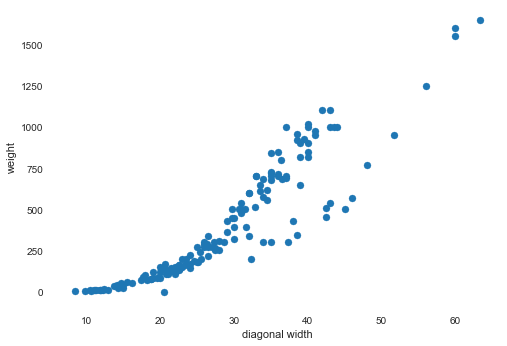

In [32]:
y = data.Weight.values.reshape(-1,1)
x = data.Length2.values.reshape(-1,1)

plt.scatter(x,y)
plt.ylabel("weight")
plt.xlabel("diagonal width")

In [33]:
# Average of 3 lengths on length1
data['Length1'] = data['Length1'].replace([data['Length1']],[(data['Length1'] +data['Length2'] + data['Length3'])/3])
#taking species as categorial data
data['Species'] = data['Species'].replace(['Bream','Roach','Whitefish','Parkki','Perch','Pike','Smelt'],[1,2,3,4,5,6,7])
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,26.200000,25.4,30.0,11.5200,4.0200
1,1,290.0,27.166667,26.3,31.2,12.4800,4.3056
2,1,340.0,27.166667,26.5,31.1,12.3778,4.6961
3,1,363.0,29.600000,29.0,33.5,12.7300,4.4555
4,1,430.0,29.833333,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,7,12.2,12.366667,12.2,13.4,2.0904,1.3936
155,7,13.4,12.533333,12.4,13.5,2.4300,1.2690
156,7,12.2,12.966667,13.0,13.8,2.2770,1.2558
157,7,19.7,14.233333,14.3,15.2,2.8728,2.0672


In [34]:
X = data[['Species','Length1','Height','Width']]
Y = data.Weight
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [35]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.8953807587296455

In [36]:
# Create a Pickle file  
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(LR, pickle_out)
pickle_out.close()